## This notebook was run in Kaggle

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [26]:
df_article = pd.read_csv('/kaggle/input/h-and-m-personalized-fashion-recommendations/articles.csv')
df_customer=pd.read_csv('/kaggle/input/h-and-m-personalized-fashion-recommendations/customers.csv')
df_transaction = pd.read_csv('/kaggle/input/h-and-m-personalized-fashion-recommendations/transactions_train.csv')

In [3]:
print("Record count of article data:", df_article.shape[0])
print("Record count of customer data:", df_customer.shape[0])
print("Record count of transaction data:",df_transaction.shape[0])

Record count of article data: 105542
Record count of customer data: 1371980
Record count of transaction data: 31788324


In [4]:
df_article.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [5]:
df_article.head(1).T

,0
article_id,108775015
product_code,108775
prod_name,Strap top
product_type_no,253
product_type_name,Vest top
product_group_name,Garment Upper body
graphical_appearance_no,1010016
graphical_appearance_name,Solid
colour_group_code,9
colour_group_name,Black


In [6]:
df_article.isnull().sum()

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

In [7]:
df_article['index_group_name'].unique()

array(['Ladieswear', 'Baby/Children', 'Menswear', 'Sport', 'Divided'],
      dtype=object)

In [8]:
grp_num=df_article.groupby('index_group_name')['index_group_name'].count()
grp_dem=len(df_article['index_group_name'])
grp_perc=(grp_num/grp_dem)*100
grp_perc

index_group_name
Baby/Children    32.888329
Divided          14.353528
Ladieswear       37.650414
Menswear         11.893843
Sport             3.213886
Name: index_group_name, dtype: float64

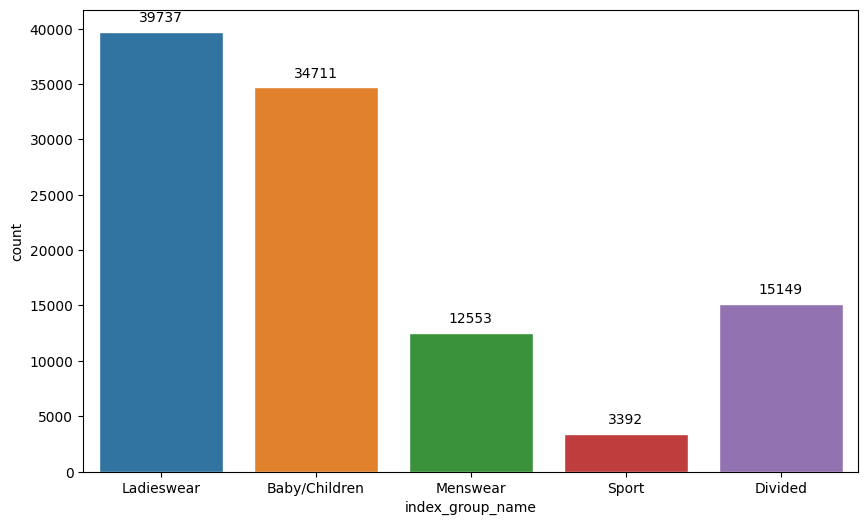

In [9]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="index_group_name", data=df_article, edgecolor="white")
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, xytext=(0, 5),textcoords='offset points')

**str(int(p.get_height())):**
* p.get_height() returns the height of the current bar in the histogram.
* int(p.get_height()) converts the height value to an integer.
* str(int(p.get_height())) converts the integer value to a string, which is the text that will be displayed as the annotation.

**(p.get_x() + p.get_width() / 2, p.get_height()):**
* p.get_x() returns the x-coordinate of the left edge of the current bar.
* p.get_width() returns the width of the current bar.
* p.get_x() + p.get_width() / 2 calculates the x-coordinate of the center of the current bar.
* p.get_height() returns the height of the current bar, which is used as the y-coordinate for the annotation.

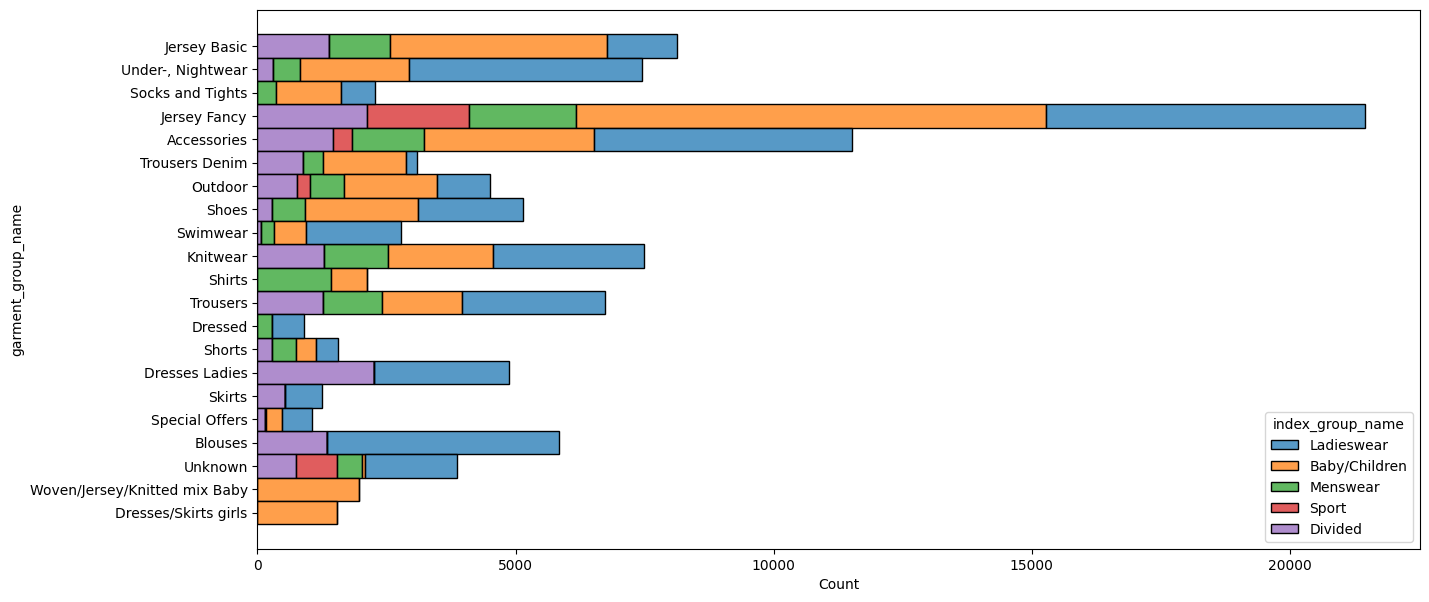

In [10]:
f,ax=plt.subplots(figsize=(15,7))
ax=sns.histplot(data=df_article,y='garment_group_name',hue='index_group_name',multiple='stack')
plt.show()

In [11]:
df_article.groupby('product_group_name')['product_group_name'].count().sort_values(ascending=False)

product_group_name
Garment Upper body       42741
Garment Lower body       19812
Garment Full body        13292
Accessories              11158
Underwear                 5490
Shoes                     5283
Swimwear                  3127
Socks & Tights            2442
Nightwear                 1899
Unknown                    121
Underwear/nightwear         54
Cosmetic                    49
Bags                        25
Items                       17
Furniture                   13
Garment and Shoe care        9
Stationery                   5
Interior textile             3
Fun                          2
Name: product_group_name, dtype: int64

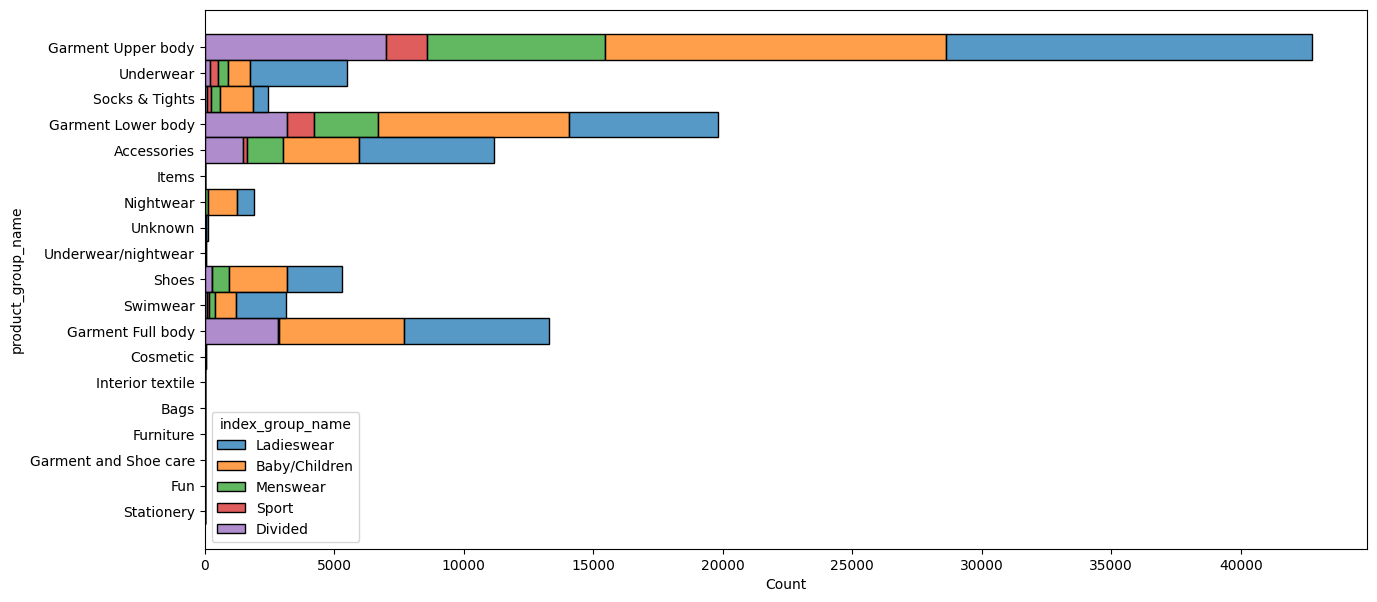

In [12]:
f,ax= plt.subplots(figsize=(15,7))
ax= sns.histplot(data=df_article,y='product_group_name',hue='index_group_name',multiple='stack')
plt.show()

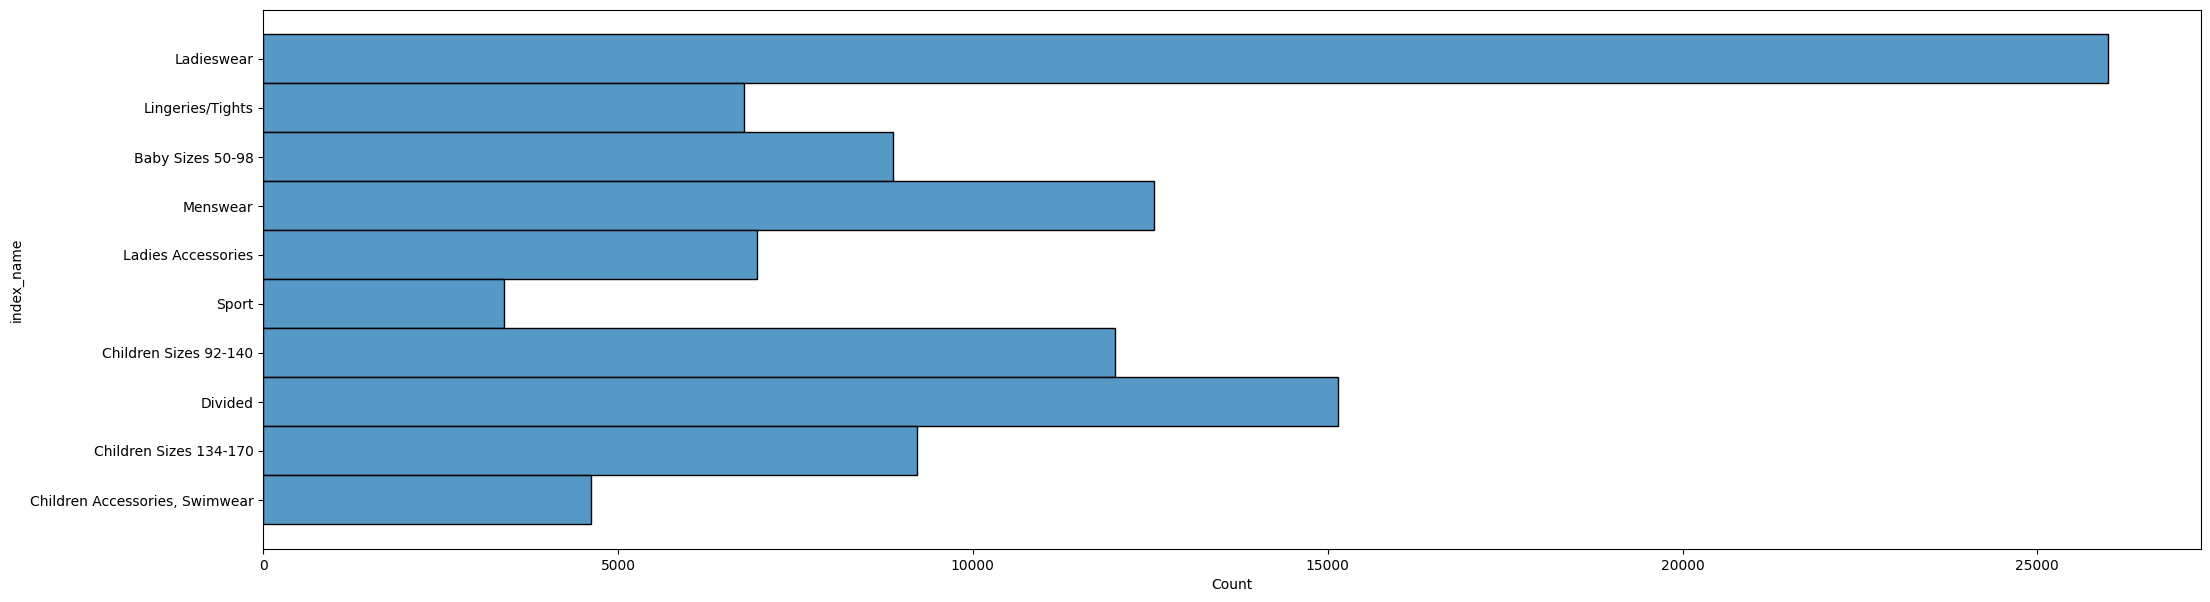

In [13]:
f,ax= plt.subplots(figsize=(25,7))
ax = sns.histplot(data=df_article,y='index_name')
plt.show()

In [14]:
pd.options.display.max_rows = None
df_article.groupby(['product_group_name','product_type_name'])['article_id'].count()

product_group_name     product_type_name       
Accessories            Accessories set                 7
                       Alice band                      6
                       Baby Bib                        3
                       Bag                          1280
                       Beanie                         56
                       Belt                          458
                       Bracelet                      180
                       Braces                          3
                       Bucket hat                      7
                       Cap                            13
                       Cap/peaked                    573
                       Dog Wear                       20
                       Earring                      1159
                       Earrings                       11
                       Eyeglasses                      2
                       Felt hat                       10
                       Giftbox          

In [15]:
df_customer.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


[]

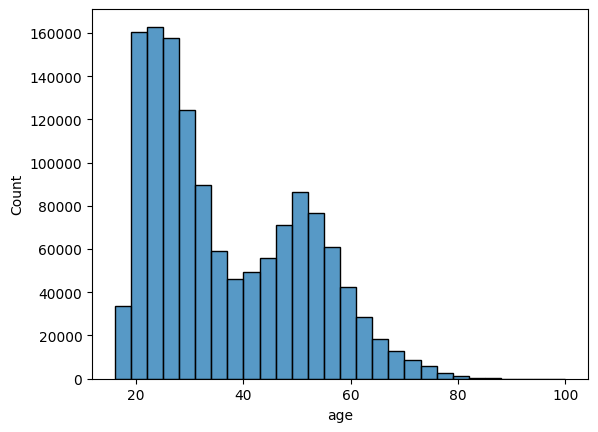

In [16]:
sns.histplot(data=df_customer, x='age', binwidth=3)
plt.plot()

In [17]:
df_customer.groupby(['fashion_news_frequency'])['fashion_news_frequency'].count()

fashion_news_frequency
Monthly         842
NONE         877711
Regularly    477416
Name: fashion_news_frequency, dtype: int64

In [18]:
df_customer.groupby(['fashion_news_frequency'])['fashion_news_frequency'].count()


fashion_news_frequency
Monthly         842
NONE         877711
Regularly    477416
Name: fashion_news_frequency, dtype: int64

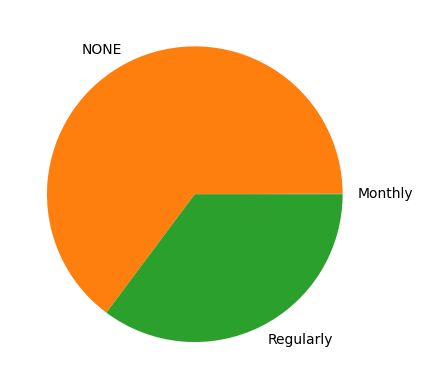

In [19]:
pie_data=df_customer.groupby(['fashion_news_frequency'])['fashion_news_frequency'].count()
plt.pie(pie_data.values, labels=pie_data.index)
plt.show()

In [20]:
num=df_customer.groupby(['club_member_status'])['club_member_status'].count()
dem=len(df_customer['club_member_status'])
perc=(num/dem)*100
perc

club_member_status
ACTIVE        92.748509
LEFT CLUB      0.034038
PRE-CREATE     6.775609
Name: club_member_status, dtype: float64

<Axes: xlabel='club_member_status', ylabel='Percent'>

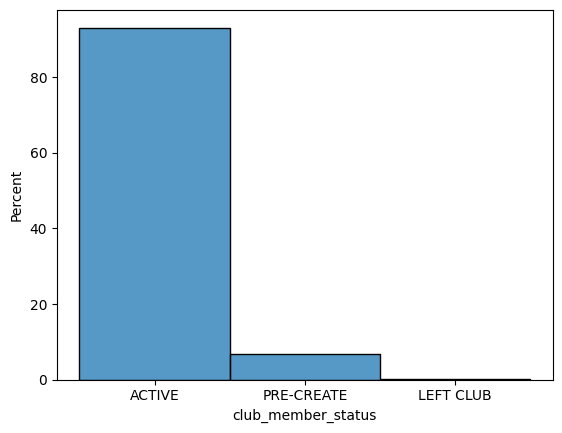

In [21]:
sns.histplot(data=df_customer, x='club_member_status',stat="percent")

In [27]:
df_transaction.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [30]:
df_transaction.isnull().sum()

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64

In [31]:
df_transaction.describe()

,article_id,price,sales_channel_id
count,3.178832e+07,3.178832e+07,3.178832e+07
mean,6.962272e+08,2.782927e-02,1.704028e+00
std,1.334480e+08,1.918113e-02,4.564786e-01
min,1.087750e+08,1.694915e-05,1.000000e+00
25%,6.328030e+08,1.581356e-02,1.000000e+00
50%,7.145820e+08,2.540678e-02,2.000000e+00
75%,7.865240e+08,3.388136e-02,2.000000e+00
max,9.562170e+08,5.915254e-01,2.000000e+00


In [33]:
#Top 10 customer id
df_transaction.groupby('customer_id').count().sort_values(by='price', ascending=False)['price'][:10]

customer_id
be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b    1895
b4db5e5259234574edfff958e170fe3a5e13b6f146752ca066abca3c156acc71    1441
49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05b50a4cd88e34d0748f    1364
a65f77281a528bf5c1e9f270141d601d116e1df33bf9df512f495ee06647a9cc    1361
cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed6012e7e5bea016b4d6    1237
55d15396193dfd45836af3a6269a079efea339e875eff42cc0c228b002548a9d    1208
c140410d72a41ee5e2e3ba3d7f5a860f337f1b5e41c27cf9bda5517c8774f8fa    1170
8df45859ccd71ef1e48e2ee9d1c65d5728c31c46ae957d659fa4e5c3af6cc076    1169
03d0011487606c37c1b1ed147fc72f285a50c05f00b9712e0fc3da400c864296    1157
6cc121e5cc202d2bf344ffe795002bdbf87178054bcda2e57161f0ef810a4b55    1143
Name: price, dtype: int64